In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [2]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


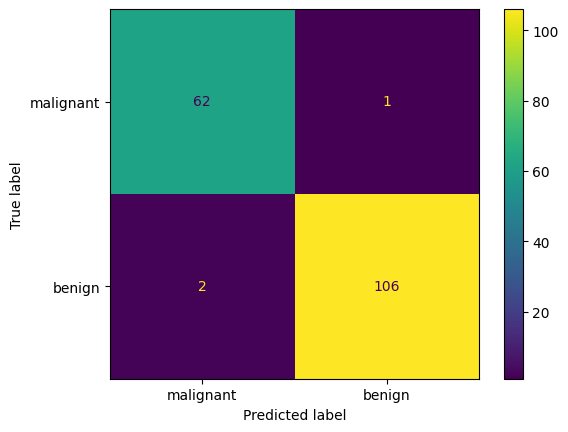

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()


In [4]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation using accuracy as the metric
cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
print("10-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())



10-Fold Cross-Validation Accuracy Scores: [0.98245614 0.98245614 0.98245614 0.96491228 0.98245614 0.98245614
 0.94736842 1.         1.         0.98214286]
Mean Accuracy: 0.9806704260651629


In [5]:
from sklearn.metrics import log_loss

# Predict probabilities for log loss
y_prob = model.predict_proba(X_test)

# Compute log loss
loss = log_loss(y_test, y_prob)
print("Cross-Entropy Log Loss:", loss)


Cross-Entropy Log Loss: 0.05977242675143036
